## Lesson 16 - Pandas Group Operations

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set max rows
pd.set_option("display.max_rows", 20)

#### index.name, reset_index, inplace=True

In [3]:
# create dataframe
df = pd.read_csv('../data/survey_scores_2015.csv', index_col=0)
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
subject_id,,,,,,,,,,,,,,
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [4]:
# remove index name
df.index.name = None
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [5]:
# transpose
df = df.transpose()
df.index.name = 'student'
df

,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
student,,,,,,,,
10000,N,NaN,0,0,0,0,0,0
13001,Y,Mac,1,2,3,0,0,0
60985,Y,Windows,0,1,1,0,2,1
43309,Y,Mac,3,3,0,0,1,2
89785,Y,Windows,2,2,0,1,2,2
57688,Y,Mac,1,1,1,0,0,0
19366,Y,Mac,0,2,3,0,0,2
97775,Y,Mac,2,2,3,0,1,0
22384,Y,Windows,0,0,2,0,0,2


In [6]:
# reset index with inplace=True (also see more advanced function pandas.DataFrame.reindex)
df.reset_index(inplace=True)
df

,student,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [7]:
# check datatypes
df.dtypes

student          object
computer_has     object
computer_os      object
score_bash       object
score_command    object
score_matlab     object
score_perl       object
score_python     object
score_r          object
dtype: object

In [8]:
# convert score columns to integers
score_cols = ['score_bash', 'score_command', 'score_matlab', 'score_perl',
              'score_python', 'score_r']
df[score_cols] = df[score_cols].astype(int)

In [9]:
# check datatypes again
df.dtypes

student          object
computer_has     object
computer_os      object
score_bash        int64
score_command     int64
score_matlab      int64
score_perl        int64
score_python      int64
score_r           int64
dtype: object

#### groupby

Group series using a series of columns or a mapper (dict or key function, apply given function to group, return result as series).

In [10]:
# create group object
comp = df.groupby('computer_os')
comp

In [11]:
# apply sum function
comp.mean()

,score_bash,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,,
Linux,1.500000,1.500,0.5,0.500000,1.000000,1.000000
Mac,1.125000,1.625,2.0,0.000000,0.375000,0.750000
Windows,0.666667,1.000,1.0,0.333333,1.333333,1.666667


In [12]:
# apply std function
comp.std()

,score_bash,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,,
Linux,0.707107,0.707107,0.707107,0.707107,0.000000,1.414214
Mac,0.991031,0.916125,1.195229,0.000000,0.517549,1.035098
Windows,1.154701,1.000000,1.000000,0.577350,1.154701,0.577350


In [13]:
# apply count function
comp.count()

,student,computer_has,score_bash,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,,,,
Linux,2,2,2,2,2,2,2,2
Mac,8,8,8,8,8,8,8,8
Windows,3,3,3,3,3,3,3,3


In [14]:
# we can group by multiple columns, and we can apply a function in-line
# and we can save it as a new dataframe
comp_bash = df.groupby(['computer_os','score_bash']).mean()
comp_bash

score_command  score_matlab  score_perl  score_python  \
computer_os score_bash                                                          
Linux       1                     1.0          1.00         0.0          1.00   
            2                     2.0          0.00         1.0          1.00   
Mac         0                     1.0          2.00         0.0          0.00   
            1                     1.5          2.25         0.0          0.25   
            2                     2.0          3.00         0.0          1.00   
            3                     3.0          0.00         0.0          1.00   
Windows     0                     0.5          1.50         0.0          1.00   
            2                     2.0          0.00         1.0          2.00   

                        score_r  
computer_os score_bash           
Linux       1               0.0  
            2               2.0  
Mac         0               1.0  
            1               0.5  
            2               0.0  
            3               2.0  
Windows     0               1.5  
            2               2.0

In [15]:
comp_bash.index

MultiIndex(levels=[['Linux', 'Mac', 'Windows'], [0, 1, 2, 3]],
           labels=[[0, 0, 1, 1, 1, 1, 2, 2], [1, 2, 0, 1, 2, 3, 0, 2]],
           names=['computer_os', 'score_bash'])

You may want to ***not*** have the columns you are grouping by become your index. This can be easily achieved as shown below.

In [16]:
comp_bash2 = df.groupby(['computer_os','score_bash'], as_index=False).mean()
comp_bash2

,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,Linux,1,1.0,1.00,0.0,1.00,0.0
1,Linux,2,2.0,0.00,1.0,1.00,2.0
2,Mac,0,1.0,2.00,0.0,0.00,1.0
3,Mac,1,1.5,2.25,0.0,0.25,0.5
4,Mac,2,2.0,3.00,0.0,1.00,0.0
5,Mac,3,3.0,0.00,0.0,1.00,2.0
6,Windows,0,0.5,1.50,0.0,1.00,1.5
7,Windows,2,2.0,0.00,1.0,2.00,2.0


In [17]:
comp_bash2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

#### melt

Massage a DataFrame into a format where one or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

In [18]:
df

,student,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [19]:
df_melted = pd.melt(df, id_vars=['computer_has', 'computer_os'], value_vars=score_cols)
df_melted

,computer_has,computer_os,variable,value
0,N,NaN,score_bash,0
1,Y,Mac,score_bash,1
2,Y,Windows,score_bash,0
3,Y,Mac,score_bash,3
4,Y,Windows,score_bash,2
5,Y,Mac,score_bash,1
6,Y,Mac,score_bash,0
7,Y,Mac,score_bash,2
8,Y,Windows,score_bash,0
9,Y,Mac,score_bash,1


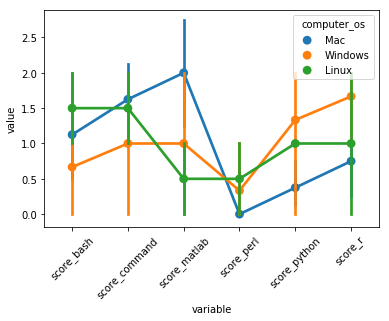

In [20]:
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted)
plt.xticks(rotation=45);

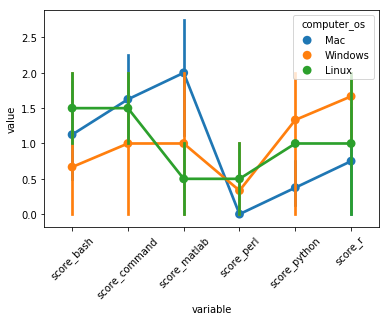

In [21]:
fig, ax = plt.subplots()
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted, axis=ax)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45);

#### pivot

Reshape data (produce a "pivot" table) based on column values. Uses unique values from index / columns to form axes of the resulting DataFrame.

`df.pivot(index=None, columns=None, values=None)`

* `index`: string or object. Column name to use to make new frame's index. If None, uses existing index.
* `columns`: string or object. Column name to use to make new frame's columns
* `values`: string or object. Column name to use for populating new frame's values. If not specified, all remaining columns will be used and the result will have hierarchically indexed columns

In [22]:
# example 1: 

df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6],
                       'faz': [1, 2, 3, 4, 5, 6]})
df

,bar,baz,faz,foo
0,A,1,1,one
1,B,2,2,one
2,C,3,3,one
3,A,4,4,two
4,B,5,5,two
5,C,6,6,two


In [23]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [24]:
df_pivot = df.pivot(index='foo', columns='bar')
df_pivot #['baz']

baz       faz      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   1  2  3
two   4  5  6   4  5  6

In [25]:
df_pivot['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [26]:
# columns is multi-level
df_pivot.columns

MultiIndex(levels=[['baz', 'faz'], ['A', 'B', 'C']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'bar'])

In [27]:
# index is not multi-level
df_pivot.index

Index(['one', 'two'], dtype='object', name='foo')

In [28]:
# example 2: create a dataframe that's "stacked"

import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df2 = unpivot(tm.makeTimeDataFrame())
df2

,date,variable,value
0,2000-01-03,A,1.236941
1,2000-01-04,A,-1.152565
2,2000-01-05,A,-1.002861
3,2000-01-03,B,0.342250
4,2000-01-04,B,-1.126330
5,2000-01-05,B,1.473337
6,2000-01-03,C,-0.503997
7,2000-01-04,C,0.671134
8,2000-01-05,C,1.230723
9,2000-01-03,D,0.159253


If we wanted all the data for variable A, we could do this:

In [29]:
df2[df2['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,1.236941
1,2000-01-04,A,-1.152565
2,2000-01-05,A,-1.002861


But suppose we wish to do time series operations with the variables. A better representation would be where the columns are the unique variables and an index of dates identifies individual observations. 

In [30]:
# to reshape the data into this form, use the pivot function
df2_pivot = df2.pivot(index='date', columns='variable', values='value')
df2_pivot

variable,A,B,C,D
date,,,,
2000-01-03,1.236941,0.342250,-0.503997,0.159253
2000-01-04,-1.152565,-1.126330,0.671134,0.786736
2000-01-05,-1.002861,1.473337,1.230723,-1.243430


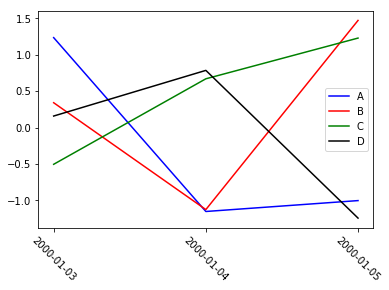

In [31]:
plt.plot(df2_pivot.index, df2_pivot.A, 'b', 
         df2_pivot.index, df2_pivot.B, 'r',
         df2_pivot.index, df2_pivot.C, 'g', 
         df2_pivot.index, df2_pivot.D, 'k')
plt.legend(df2_pivot.columns)
xlabels = [x.strftime('%Y-%m-%d') for x in df2_pivot.index]
plt.xticks(xlabels, xlabels)
plt.xticks(rotation=-45);

#### pivot_table

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame. Generalization of pivot that can handle duplicate values for one index/column pair.

`df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`

#### stack

Pivot a level of the column labels (inverse operation from `unstack`).

`df.stack(level=-1, dropna=True)`

* `level`: int, string, or list of these, default last level. Level(s) to stack, can pass level name
* `dropna`: boolean, default True. Whether to drop rows in the resulting Frame/Series with no valid values

#### unstack

Pivot based on the index values, instead of a column. Requires hierarchical index labels, returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

`df.unstack(level=-1, fill_value=None)`

* `level`: int, string, or list of these, default -1 (last level) Level(s) of index to unstack, can pass level name
* `fill_value`: replace NaN with this value if the unstack produces missing values

### Group operations with Earth Microbiome Project metadata

In [32]:
df = pd.read_csv('../data/emp_qiime_mapping_subset_2k.tsv', sep='\t')

In [33]:
df.columns

Index(['#SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'Description',
       'host_subject_id', 'study_id', 'title', 'principal_investigator', 'doi',
       'ebi_accession', 'target_gene', 'target_subfragment', 'pcr_primers',
       'illumina_technology', 'extraction_center', 'run_center', 'run_date',
       'read_length_bp', 'sequences_split_libraries',
       'observations_closed_ref_greengenes', 'observations_closed_ref_silva',
       'observations_open_ref_greengenes', 'observations_deblur_90bp',
       'observations_deblur_100bp', 'observations_deblur_150bp',
       'emp_release1', 'qc_filtered', 'subset_10k', 'subset_5k', 'subset_2k',
       'sample_taxid', 'sample_scientific_name', 'host_taxid',
       'host_common_name_provided', 'host_common_name', 'host_scientific_name',
       'host_superkingdom', 'host_kingdom', 'host_phylum', 'host_class',
       'host_order', 'host_family', 'host_genus', 'host_species',
       'collection_timestamp', 'country', 'latitude_deg', 'lo

In [34]:
df = df[['#SampleID', 'study_id', 'observations_deblur_90bp', 'latitude_deg', 'longitude_deg',
         'temperature_deg_c', 'empo_3', 'envo_biome_2']]

In [35]:
df

,#SampleID,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
0,550.L1S116.s.1.sequence,550,22567,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
1,550.L1S119.s.1.sequence,550,27871,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
2,550.L1S164.s.1.sequence,550,24134,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
3,550.L1S194.s.1.sequence,550,30041,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
4,550.L1S20.s.1.sequence,550,21132,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
5,550.L1S26.s.1.sequence,550,20875,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
6,550.L1S264.s.1.sequence,550,25919,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
7,550.L1S273.s.1.sequence,550,32962,40.01500,-105.27100,NaN,Animal distal gut,anthropogenic terrestrial biome
8,550.L2S103.s.2.sequence,550,10838,40.01500,-105.27100,NaN,Animal surface,anthropogenic terrestrial biome
9,550.L2S144.s.2.sequence,550,13559,40.01500,-105.27100,NaN,Animal surface,anthropogenic terrestrial biome


In [36]:
# get only rows with temperature data, then reset index (and drop old index)
df = df[df.temperature_deg_c.notna()].reset_index(drop=True)

In [37]:
df

,#SampleID,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
0,678.OA.mesocosm.362,678,40702,50.33800,-4.14800,11.000000,Sediment (saline),marine biome
1,678.OA.mesocosm.376,678,15180,50.33800,-4.14800,10.800000,Sediment (saline),marine biome
2,678.OA.mesocosm.410,678,18674,50.33800,-4.14800,12.100000,Sediment (saline),marine biome
3,678.OA.mesocosm.417,678,53128,50.33800,-4.14800,11.000000,Sediment (saline),marine biome
4,678.OA.mesocosm.431,678,20626,50.33800,-4.14800,11.100000,Sediment (saline),marine biome
5,678.OA.mesocosm.438,678,19904,50.33800,-4.14800,11.600000,Sediment (saline),marine biome
6,723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137...,723,163972,78.71200,-104.87800,-1.642100,Water (saline),marine biome
7,723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137...,723,90238,78.71200,-104.87800,-1.648100,Water (saline),marine biome
8,723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137...,723,128593,78.71200,-104.87800,-1.648000,Water (saline),marine biome
9,723.C8.10m.G3.Catlin1.16Spool.110602.HWI.EAS13...,723,66563,78.71200,-104.87800,-1.650800,Water (saline),marine biome


In [38]:
# melt
pd.melt(df, id_vars=['#SampleID'], value_vars=['observations_deblur_90bp', 'latitude_deg', 
                                               'longitude_deg', 'temperature_deg_c'])

,#SampleID,variable,value
0,678.OA.mesocosm.362,observations_deblur_90bp,40702.000000
1,678.OA.mesocosm.376,observations_deblur_90bp,15180.000000
2,678.OA.mesocosm.410,observations_deblur_90bp,18674.000000
3,678.OA.mesocosm.417,observations_deblur_90bp,53128.000000
4,678.OA.mesocosm.431,observations_deblur_90bp,20626.000000
5,678.OA.mesocosm.438,observations_deblur_90bp,19904.000000
6,723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137...,observations_deblur_90bp,163972.000000
7,723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137...,observations_deblur_90bp,90238.000000
8,723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137...,observations_deblur_90bp,128593.000000
9,723.C8.10m.G3.Catlin1.16Spool.110602.HWI.EAS13...,observations_deblur_90bp,66563.000000


In [39]:
# pivot_table
df.pivot_table(index='empo_3', columns='envo_biome_2', values='latitude_deg', aggfunc='mean')

envo_biome_2,anthropogenic terrestrial biome,forest biome,freshwater biome,marine biome,tundra biome
empo_3,,,,,
Aerosol (non-saline),40.154286,NaN,NaN,NaN,NaN
Animal distal gut,NaN,47.93713,NaN,NaN,NaN
Plant rhizosphere,33.194000,NaN,NaN,NaN,NaN
Plant surface,NaN,NaN,NaN,-38.904496,NaN
Sediment (non-saline),NaN,NaN,45.584972,NaN,NaN
Sediment (saline),NaN,NaN,NaN,58.652135,NaN
Soil (non-saline),38.863750,19.38900,NaN,NaN,71.296
Surface (non-saline),44.545429,19.38900,NaN,NaN,NaN
Surface (saline),NaN,NaN,NaN,37.252081,NaN


In [40]:
# before proceeding, let's change the index to match '#SampleID' column
df.index = df['#SampleID']
df

,#SampleID,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
#SampleID,,,,,,,,
678.OA.mesocosm.362,678.OA.mesocosm.362,678,40702,50.33800,-4.14800,11.000000,Sediment (saline),marine biome
678.OA.mesocosm.376,678.OA.mesocosm.376,678,15180,50.33800,-4.14800,10.800000,Sediment (saline),marine biome
678.OA.mesocosm.410,678.OA.mesocosm.410,678,18674,50.33800,-4.14800,12.100000,Sediment (saline),marine biome
678.OA.mesocosm.417,678.OA.mesocosm.417,678,53128,50.33800,-4.14800,11.000000,Sediment (saline),marine biome
678.OA.mesocosm.431,678.OA.mesocosm.431,678,20626,50.33800,-4.14800,11.100000,Sediment (saline),marine biome
678.OA.mesocosm.438,678.OA.mesocosm.438,678,19904,50.33800,-4.14800,11.600000,Sediment (saline),marine biome
723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137...,723,163972,78.71200,-104.87800,-1.642100,Water (saline),marine biome
723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137...,723,90238,78.71200,-104.87800,-1.648100,Water (saline),marine biome
723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137...,723,128593,78.71200,-104.87800,-1.648000,Water (saline),marine biome


In [41]:
# then we will drop the '#SampleID' column
df.drop('#SampleID', axis=1, inplace=True)
df

,study_id,observations_deblur_90bp,latitude_deg,longitude_deg,temperature_deg_c,empo_3,envo_biome_2
#SampleID,,,,,,,
678.OA.mesocosm.362,678,40702,50.33800,-4.14800,11.000000,Sediment (saline),marine biome
678.OA.mesocosm.376,678,15180,50.33800,-4.14800,10.800000,Sediment (saline),marine biome
678.OA.mesocosm.410,678,18674,50.33800,-4.14800,12.100000,Sediment (saline),marine biome
678.OA.mesocosm.417,678,53128,50.33800,-4.14800,11.000000,Sediment (saline),marine biome
678.OA.mesocosm.431,678,20626,50.33800,-4.14800,11.100000,Sediment (saline),marine biome
678.OA.mesocosm.438,678,19904,50.33800,-4.14800,11.600000,Sediment (saline),marine biome
723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723,163972,78.71200,-104.87800,-1.642100,Water (saline),marine biome
723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723,90238,78.71200,-104.87800,-1.648100,Water (saline),marine biome
723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence,723,128593,78.71200,-104.87800,-1.648000,Water (saline),marine biome


In [42]:
# stack - indexes become top-level hierarchical indexes, columns become second-level hierarchical indexes
df_stack = df.stack()
df_stack

#SampleID                                      
678.OA.mesocosm.362    study_id                                  678
                       observations_deblur_90bp                40702
                       latitude_deg                           50.338
                       longitude_deg                          -4.148
                       temperature_deg_c                          11
                       empo_3                      Sediment (saline)
                       envo_biome_2                     marine biome
678.OA.mesocosm.376    study_id                                  678
                       observations_deblur_90bp                15180
                       latitude_deg                           50.338
                                                         ...        
2300.BB.4087.lavage20  temperature_deg_c                     35.0556
                       empo_3                      Animal distal gut
                       envo_biome_2                    

In [43]:
type(df_stack)

pandas.core.series.Series

In [44]:
# to get all values for one index (row in the df that was stacked)
df_stack['678.OA.mesocosm.362']

study_id                                  678
observations_deblur_90bp                40702
latitude_deg                           50.338
longitude_deg                          -4.148
temperature_deg_c                          11
empo_3                      Sediment (saline)
envo_biome_2                     marine biome
dtype: object

In [45]:
# to get a single value (three ways of indexing)
df_stack['678.OA.mesocosm.362']['temperature_deg_c']

11.0

In [46]:
df_stack.loc['678.OA.mesocosm.362', 'temperature_deg_c']

11.0

In [47]:
df_stack['678.OA.mesocosm.362', 'temperature_deg_c']

11.0

In [48]:
# unstack - columns become top-level hierarchical indexes, indexes become second-level hierarchical indexes
df_unstack = df.unstack()
df_unstack

              #SampleID                                                           
study_id      678.OA.mesocosm.362                                                              678
              678.OA.mesocosm.376                                                              678
              678.OA.mesocosm.410                                                              678
              678.OA.mesocosm.417                                                              678
              678.OA.mesocosm.431                                                              678
              678.OA.mesocosm.438                                                              678
              723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence              723
              723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence              723
              723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence              723
              723.C8.10m.G

In [49]:
type(df_unstack)

pandas.core.series.Series

In [50]:
# to get all values for one index (column in the df that was stacked)
df_unstack['temperature_deg_c'] # identical to df.temperature_deg_c

#SampleID
678.OA.mesocosm.362                                                          11
678.OA.mesocosm.376                                                        10.8
678.OA.mesocosm.410                                                        12.1
678.OA.mesocosm.417                                                          11
678.OA.mesocosm.431                                                        11.1
678.OA.mesocosm.438                                                        11.6
723.C7.0m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence     -1.6421
723.C7.3m.L3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence     -1.6481
723.C7.5m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence      -1.648
723.C8.10m.G3.Catlin1.16Spool.110602.HWI.EAS137R.0375.s.3.1.sequence    -1.6508
                                                                         ...   
2229.W2.N3.5.HP2.Thomas.CMB.Seaweed.lane5.NoIndex.L005                     15.6
2229.W2.T1.4.HP1.Thomas.CMB.Se

In [51]:
# to get a single value (three ways of indexing)
df_unstack['temperature_deg_c']['678.OA.mesocosm.362']

11.0

In [52]:
df_unstack.loc['temperature_deg_c', '678.OA.mesocosm.362']

11.0

In [53]:
df_unstack['temperature_deg_c', '678.OA.mesocosm.362']

11.0